In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [167]:
df = pd.read_excel("sods.xlsx")

In [168]:
df.head(5)

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...


Tirando informações do dataframe

In [169]:
df.describe()

,idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   pcd                      4271 non-null   object 
 4   vive_no_brasil           4271 non-null   bool   
 5   estado_moradia           4156 non-null   object 
 6   nivel_ensino             4271 non-null   object 
 7   formacao                 4149 non-null   object 
 8   tempo_experiencia_dados  3694 non-null   object 
 9   linguagens_preferidas    2979 non-null   object 
 10  bancos_de_dados          2978 non-null   object 
 11  cloud_preferida          2981 non-null   object 
 12  cargo                    2981 non-null   object 
dtypes: bool(1), float64(1), object(11)
memory usage: 404.7+ KB


In [171]:
df.isnull().sum()

idade                        74
genero                        9
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia              115
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
dtype: int64

Colcando 'Prefiro não informar' nos dados da coluna genero com NaN

In [172]:
df['genero'] = df['genero'].fillna('Prefiro não informar')

Analisando a idade media geral e por genero

In [173]:
df['idade'].mean()

np.float64(31.169168453657374)

In [174]:
df.groupby(['genero'])['idade'].mean()

genero
Feminino                31.318052
Masculino               31.147876
Prefiro não informar    26.473684
Name: idade, dtype: float64

Verificando quantos dados são nulos novamente

In [175]:
df.isnull().sum()

idade                        74
genero                        0
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia              115
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
dtype: int64

Copia de seguração do df

In [176]:
df2  = df.copy()

Analisando se existe uma relação entre entre os dados das colunas "cargo","banco_de_dados","linguagens_preferidas","cloud_preferida"

In [177]:
df2['carreira_nan'] = df['cargo'].isna() & df['cloud_preferida'].isna() & df['bancos_de_dados'].isna() & df['linguagens_preferidas'].isna()

Existe uma relação 

In [178]:
df2['carreira_nan'].sum()

np.int64(1290)

Analisando se existe uma relação entre entre os dados das colunas "banco_de_dados","linguagens_preferidas"

In [179]:
df2['linguagem_banco'] = df['bancos_de_dados'].isna() & df['linguagens_preferidas'].isna()

Existe uma relação

In [180]:
df2['linguagem_banco'].sum()

np.int64(1292)

Analisando se existe uma relação entre entre os dados das colunas "tempo_experiencia_dados","formacao"

In [181]:
df2['tempo_formacao'] = df['tempo_experiencia_dados'].isna() & df['formacao'].isna()

não existe uma relação totalmente direta

In [182]:
df2['tempo_formacao'].sum()

np.int64(29)

Preenchendo os dados faltandos em "estado_moradia" por "Não informado"

In [183]:
df2['estado_moradia'] = df['estado_moradia'].fillna('Não Informado')

Verificando dados nulos

In [184]:
df2.isnull().sum()

idade                        74
genero                        0
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia                0
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
carreira_nan                  0
linguagem_banco               0
tempo_formacao                0
dtype: int64

 Criando uma matriz para armazenar as idades medias por generos e substituir nos respctivos dados NaN na coluna "idade"

In [185]:
idades_generos = df.groupby(['genero'])['idade'].mean()

In [186]:
idades_generos

genero
Feminino                31.318052
Masculino               31.147876
Prefiro não informar    26.473684
Name: idade, dtype: float64

In [187]:
f = round(idades_generos['Feminino'])
m = round(idades_generos['Masculino'])
n = round(idades_generos['Prefiro não informar'])

print (f,m,n)

31 31 26


Criando novamente uma copia de segurança

In [188]:
df3 = df2.copy()

Criando uma condição para substituir a idade media de cada genero somente no genero escolhido 

In [189]:
condicao = (df['idade'].isna()) & (df['genero'] == 'Masculino')
df2.loc[condicao, 'idade'] = m

In [190]:
condicao = (df['idade'].isna()) & (df['genero'] == 'Prefiro não informar')
df2.loc[condicao, 'idade'] = n

In [191]:
condicao = (df['idade'].isna()) & (df['genero'] == 'Feminino')
df2.loc[condicao, 'idade'] = f

Verificando a nova media

In [192]:
df2.groupby(['genero'])['idade'].mean()

genero
Feminino                31.315341
Masculino               31.144959
Prefiro não informar    26.428571
Name: idade, dtype: float64

Analisando os dados vazios

In [193]:
df2.isnull().sum()

idade                         0
genero                        0
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia                0
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
carreira_nan                  0
linguagem_banco               0
tempo_formacao                0
dtype: int64

atualizando a copia de segurança

In [194]:
df3 = df2.copy()

Dropando todas as linhas que possuem 'carreira_nan' como True. Pois essas linhas possuem 4 dados vazios importantes

In [195]:
df3 = df2[~df2['carreira_nan']]

Verificando os dados vazios

In [196]:
df3.isnull().sum()

idade                       0
genero                      0
etnia                       0
pcd                         0
vive_no_brasil              0
estado_moradia              0
nivel_ensino                0
formacao                   74
tempo_experiencia_dados     0
linguagens_preferidas       2
bancos_de_dados             3
cloud_preferida             0
cargo                       0
carreira_nan                0
linguagem_banco             0
tempo_formacao              0
dtype: int64

Substituindo os valores vazios de "formacao" por 'Prefiro não informar' e "linguagens_preferidas" por 'Não sei opinar'

In [197]:
df3.loc[:, 'formacao'] = df3['formacao'].fillna('Prefiro não informar')

In [198]:
df3.loc[:,'linguagens_preferidas'] = df3['linguagens_preferidas'].fillna('Não sei opinar')

In [199]:
df3.loc[:,'bancos_de_dados'] = df3['bancos_de_dados'].fillna('Prefiro não informar')

In [200]:
df3.isnull().sum()

idade                      0
genero                     0
etnia                      0
pcd                        0
vive_no_brasil             0
estado_moradia             0
nivel_ensino               0
formacao                   0
tempo_experiencia_dados    0
linguagens_preferidas      0
bancos_de_dados            0
cloud_preferida            0
cargo                      0
carreira_nan               0
linguagem_banco            0
tempo_formacao             0
dtype: int64

In [201]:
df3.head(4270)

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo,carreira_nan,linguagem_banco,tempo_formacao
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados,False,False,False
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...,False,False,False
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist,False,False,False
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...,False,False,False
5,32.0,Feminino,Parda,Não,True,Ceará (CE),Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,Python,Google BigQuery,Google Cloud (GCP),Professor,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,28.0,Masculino,Branca,Não,True,Paraná (PR),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Julia,SQLite,Azure (Microsoft),Analista de Marketing,False,False,False
4266,26.0,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst,False,False,False
4267,30.0,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,Python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...,False,False,False
4269,31.0,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,Prefiro não informar,Menos de 1 ano,Python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção,False,False,False


Dropando as colunas que foram usadas para analisar as correlações

In [202]:
df3 = df3.drop(columns='tempo_formacao')
df3 = df3.drop(columns='carreira_nan')
df3 = df3.drop(columns='linguagem_banco')

Analisando as linguagens preferidas por genero. Verificando que existem respostas inconsistentes  

In [203]:
df3.groupby(['genero','linguagens_preferidas']).size()

genero                linguagens_preferidas           
Feminino              C/C++/C#                               7
                      Dax                                    1
                      Excel                                  1
                      Java                                   1
                      Julia                                  4
                      KQL                                    1
                      Nenhum                                 1
                      NÃO SEI                                1
                      Não sei                                1
                      Não sei opinar                         1
                      Não uso                                1
                      Não utilizo                            1
                      PySpark                                2
                      Python                               617
                      R                                     83


Tratamento dos dados da coluna "linguagens_preferidas"

In [204]:
df3['linguagens_preferidas'] = df3['linguagens_preferidas'].apply(lambda x: x.lower())

In [205]:
df3['linguagens_preferidas'] = df3['linguagens_preferidas'].replace("não sei", "não sei opinar")
df3.loc[df3['linguagens_preferidas'] == "não uso", 'linguagens_preferidas'] = "não sei opinar"
df3.loc[df3['linguagens_preferidas'] == "não utilizo", 'linguagens_preferidas'] = "não sei opinar"
df3.loc[df3['linguagens_preferidas'] == "nenhum", 'linguagens_preferidas'] = "não sei opinar"
df3.loc[df3['linguagens_preferidas'] == "nao atuo com programação", 'linguagens_preferidas'] = "não sei opinar"
df3.loc[df3['linguagens_preferidas'] == "nenhuma", 'linguagens_preferidas'] = "não sei opinar"


df3['linguagens_preferidas'] = df3['linguagens_preferidas'].replace("aql", "sql")
df3['linguagens_preferidas'] = df3['linguagens_preferidas'].replace("kql", "sql")

df3['linguagens_preferidas'] = df3['linguagens_preferidas'].replace("m", "m language")

df3['linguagens_preferidas'] = df3['linguagens_preferidas'].replace("xlsx", "excel")

df3['linguagens_preferidas'] = df3['linguagens_preferidas'].replace("softwares estatísticos como spss", "não sei opinar")

In [206]:
df3.groupby(['genero','linguagens_preferidas']).size()

genero                linguagens_preferidas
Feminino              c/c++/c#                    7
                      dax                         1
                      excel                       1
                      java                        1
                      javascript                  1
                      julia                       4
                      não sei opinar              7
                      pyspark                     2
                      python                    617
                      r                          83
                      scala                       8
                      spark                       2
                      sql                        19
                      sql postegres               1
Masculino             c/c++/c#                   18
                      clojure                     1
                      elixir                      3
                      excel                       2
                    

Analisando se existe alguma inconsistencia na relação "tempo_experiencia_dados" por genero. Verificando que não

In [207]:
df3.groupby(['genero','tempo_experiencia_dados']).size()

genero                tempo_experiencia_dados               
Feminino              Mais de 10 anos                            45
                      Menos de 1 ano                            146
                      Não tenho experiência na área de dados     45
                      de 1 a 2 anos                             242
                      de 3 a 4 anos                             135
                      de 4 a 6 anos                              90
                      de 7 a 10 anos                             51
Masculino             Mais de 10 anos                           166
                      Menos de 1 ano                            389
                      Não tenho experiência na área de dados    112
                      de 1 a 2 anos                             658
                      de 3 a 4 anos                             471
                      de 4 a 6 anos                             280
                      de 7 a 10 anos                   

Resentando Index 

In [208]:
df3 = df3.reset_index(drop=True)

Mudando o tipo da idade de float para int

In [209]:
df3['idade'] = df3['idade'].astype(int)

In [210]:
df3

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,r,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,53,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
2,27,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
3,46,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
4,32,Feminino,Parda,Não,True,Ceará (CE),Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,python,Google BigQuery,Google Cloud (GCP),Professor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,28,Masculino,Branca,Não,True,Paraná (PR),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,julia,SQLite,Azure (Microsoft),Analista de Marketing
2977,26,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst
2978,30,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...
2979,31,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,Prefiro não informar,Menos de 1 ano,python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção


# FAZENDO GRAFICOS

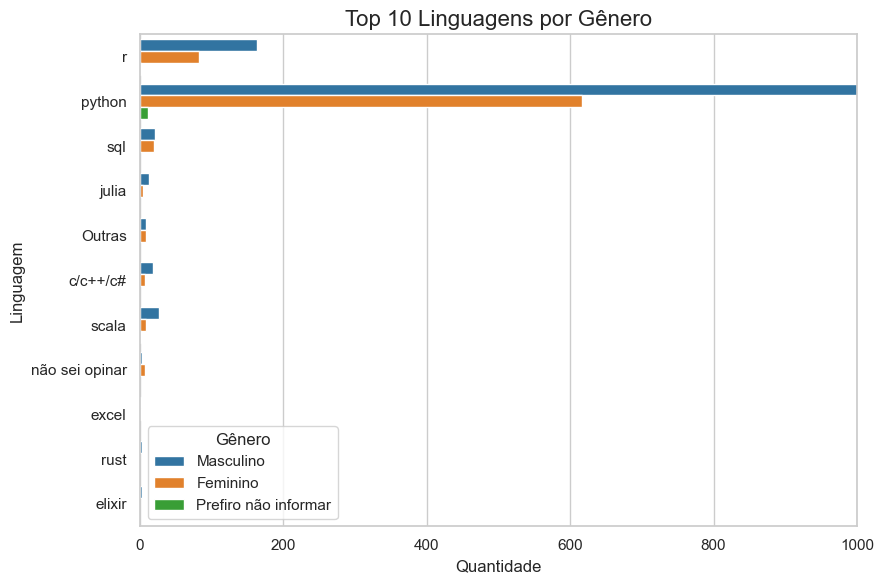

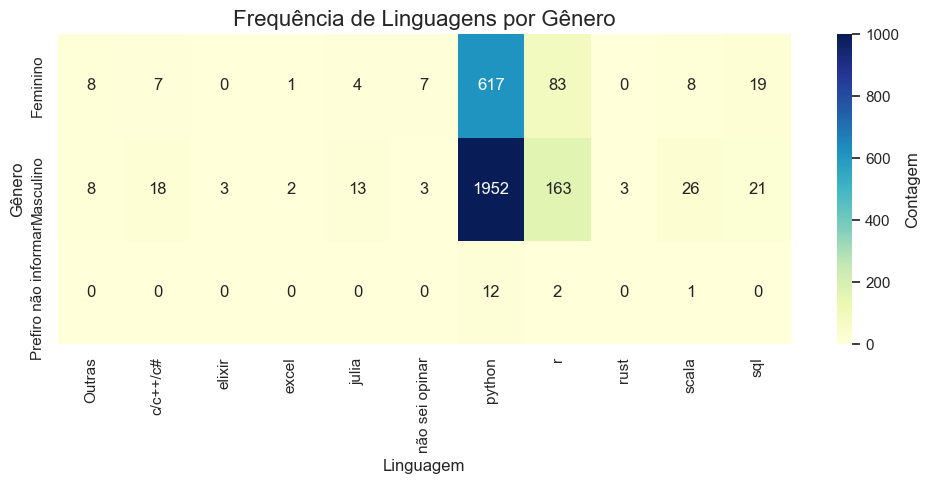

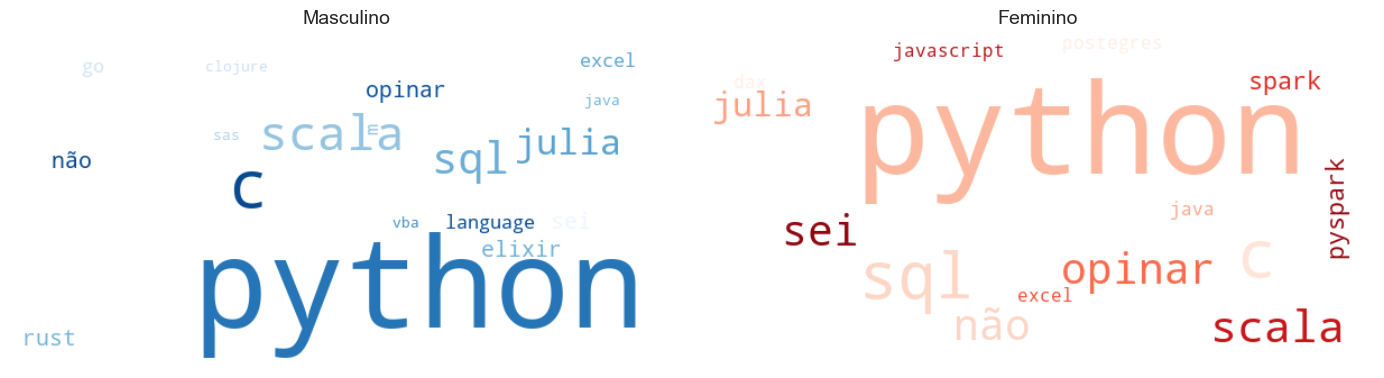

In [211]:
# Usar seu DataFrame real
df = df3.copy()

# ----------  Top N linguagens ----------
top_linguagens = df['linguagens_preferidas'].value_counts().nlargest(10).index
df['linguagem_top'] = df['linguagens_preferidas'].where(
    df['linguagens_preferidas'].isin(top_linguagens), other="Outras"
)

plt.figure(figsize=(9,6))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, y="linguagem_top", hue="genero",palette={"Masculino":"#1f77b4","Feminino":"#ff7f0e","Prefiro não informar":"#29af25e6"}
)
plt.title("Top 10 Linguagens por Gênero", fontsize=16)
plt.xlabel("Quantidade")
plt.ylabel("Linguagem")
plt.xlim(0, 1000)  # limite ajustado
plt.legend(title="Gênero")
plt.tight_layout()
plt.show()

# ----------  Heatmap de frequência ----------
contagem = df.groupby(['genero','linguagem_top']).size().unstack(fill_value=0)

plt.figure(figsize=(10,5))
sns.heatmap(
    contagem, annot=True, fmt="d", cmap="YlGnBu",
    vmin=0, vmax=1000, cbar_kws={'label': 'Contagem'}
)
plt.title("Frequência de Linguagens por Gênero", fontsize=16)
plt.ylabel("Gênero")
plt.xlabel("Linguagem")
plt.tight_layout()
plt.show()

# ----------  Wordclouds lado a lado ----------
texto_m = " ".join(df[df['genero']=="Masculino"]['linguagens_preferidas'].dropna().astype(str))
wordcloud_m = WordCloud(
    width=600, height=300, background_color="white",
    colormap="Blues", collocations=False
).generate(texto_m)

texto_f = " ".join(df[df['genero']=="Feminino"]['linguagens_preferidas'].dropna().astype(str))
wordcloud_f = WordCloud(
    width=600, height=300, background_color="white",
    colormap="Reds", collocations=False
).generate(texto_f)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_m, interpolation="bilinear")
plt.axis("off")
plt.title("Masculino", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wordcloud_f, interpolation="bilinear")
plt.axis("off")
plt.title("Feminino", fontsize=14)

plt.tight_layout()
plt.show()
